In [1]:
import numpy as np
from numpy import pi, cos, sin
from math import dist, ceil, sqrt, exp
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams

In [2]:
def view_window_continuous(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()
    
    
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
    
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

In [3]:
def softmax(vector):
    sum_exp = 0
    for x in vector:
        sum_exp = sum_exp + exp(x)
    for i in range(len(vector)):
        vector[i] = exp(vector[i])/sum_exp
    return vector

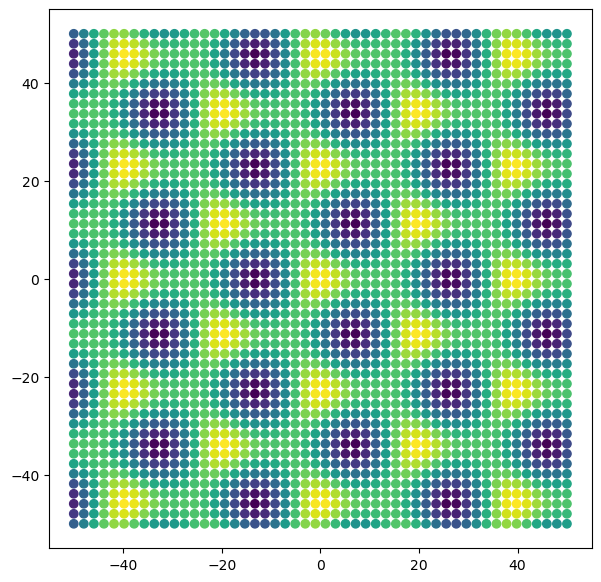

In [4]:
def p3(x,y):
    X = 1/(2 * pi) * (x + y / (3**(1/2)))
    Y = 1/(2 * pi) * 2 * y / (3**(1/2))
    C = cos(X + Y) + cos(X - 2 * Y) + cos(-2 * X + Y)
    S = sin(X + Y) +sin(X - 2*Y) +sin(-2 * X + Y)
    return C + S

view_window_continuous(p3, 50,100)

In [82]:
pixels = get_pixels(num_pixels=50, window_size=70)
isos_inv = generate_isom(n_isos=10, x_translate=200, y_translate=200)
colors = []
for i in isos_inv:
    colors.append(new_colors(pixels = pixels, iso_inv = i, image_function = p3))
#output = p_hom(M, maxdim, coeff)
#colors_softmax = []
#for i in range(len(colors)):
#    colors_softmax.append(softmax(colors[i]))


In [83]:
min(min(colors))

-4.096482653035996

In [55]:
colors_softmax = []
for i in range(len(colors)):
    colors_softmax.append(softmax(colors[i]))

In [56]:
colors_softmax

[[9.519436670052897e-05,
  0.0002557429980180314,
  0.0005354410263339939,
  0.0007777190136025239,
  0.0007379117790886954,
  0.0004597363245493342,
  0.0002016568957904025,
  7.046179970433325e-05,
  2.29760334294949e-05,
  8.276847914839832e-06,
  3.839780267034885e-06,
  2.572024887883937e-06,
  2.6360449628514075e-06,
  4.1040766267676456e-06,
  9.040202434566693e-06,
  2.488860699088232e-05,
  7.314840609206824e-05,
  0.0001941855683241858,
  0.00040040978590928037,
  0.0005735857209863239,
  0.0005400788263103493,
  0.00033733335935686197,
  0.00015020270147068503,
  5.39474670285078e-05,
  1.82667408154724e-05,
  6.87213509414329e-06,
  3.3287639628078443e-06,
  2.3129416118913707e-06,
  2.429309873494985e-06,
  3.814662038481773e-06,
  8.330502421922229e-06,
  2.23902604522405e-05,
  6.355635493046837e-05,
  0.00016232363675585236,
  0.00032335860538502015,
  0.0004529100608072706,
  0.00042468508455868596,
  0.0002700143321437834,
  0.0001251075354154886,
  4.7625776052752136

In [57]:
colors

[[9.519436670052897e-05,
  0.0002557429980180314,
  0.0005354410263339939,
  0.0007777190136025239,
  0.0007379117790886954,
  0.0004597363245493342,
  0.0002016568957904025,
  7.046179970433325e-05,
  2.29760334294949e-05,
  8.276847914839832e-06,
  3.839780267034885e-06,
  2.572024887883937e-06,
  2.6360449628514075e-06,
  4.1040766267676456e-06,
  9.040202434566693e-06,
  2.488860699088232e-05,
  7.314840609206824e-05,
  0.0001941855683241858,
  0.00040040978590928037,
  0.0005735857209863239,
  0.0005400788263103493,
  0.00033733335935686197,
  0.00015020270147068503,
  5.39474670285078e-05,
  1.82667408154724e-05,
  6.87213509414329e-06,
  3.3287639628078443e-06,
  2.3129416118913707e-06,
  2.429309873494985e-06,
  3.814662038481773e-06,
  8.330502421922229e-06,
  2.23902604522405e-05,
  6.355635493046837e-05,
  0.00016232363675585236,
  0.00032335860538502015,
  0.0004529100608072706,
  0.00042468508455868596,
  0.0002700143321437834,
  0.0001251075354154886,
  4.7625776052752136

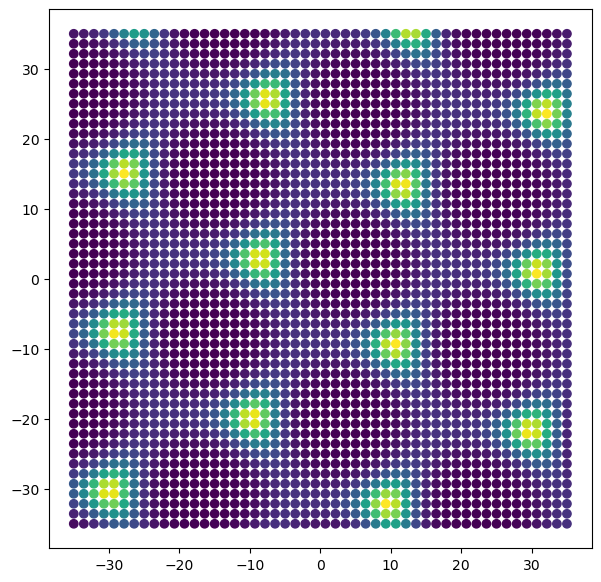

In [58]:
x_points = []
y_points = []
for i in range(len(pixels)):
    x_points.append(pixels[i][0])
    y_points.append(pixels[i][1])
    
fig = plt.figure(figsize = (7, 7))
ax = plt.axes()
ax.scatter(x_points, y_points, c = colors[0])
plt.show()

In [63]:
def matrix_of_images_softmax(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append((softmax(new_colors(pixels, i, image_function)))
    M = np.concatenate(vectors, axis=0 )
    return M

def pipeline_softmax(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images_softmax(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


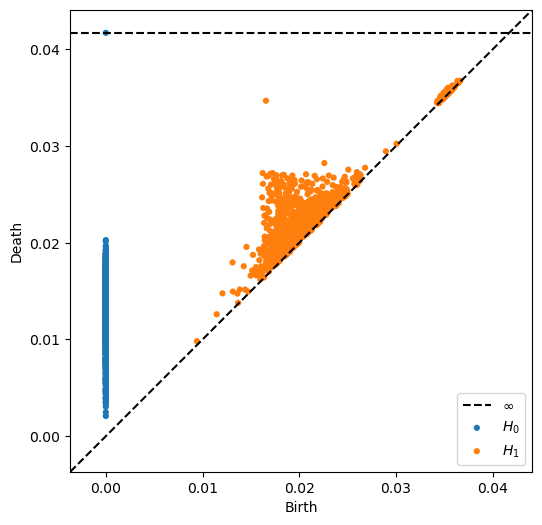

In [65]:
output = pipeline_softmax(image_function=p3, num_pixels = 50, window_size = 50, n_isos=1000, x_translate=200, y_translate=200, maxdim=1, coeff=3)
plot_dgms(output)

In [66]:
persistent_H1_intervals(output)

[0.018129665404558182,
 0.010976620018482208,
 0.010217703878879547,
 0.010120473802089691,
 0.010112887248396873,
 0.00996008887887001,
 0.00984339788556099,
 0.009387269616127014,
 0.009229723364114761,
 0.009025046601891518,
 0.008938644081354141,
 0.008807696402072906,
 0.008797656744718552,
 0.008731521666049957,
 0.0086740180850029,
 0.008640225976705551,
 0.008530678227543831,
 0.00823405385017395,
 0.008224545046687126,
 0.00818924605846405,
 0.008175652474164963,
 0.008040720596909523,
 0.008004963397979736,
 0.007907480001449585,
 0.007843481376767159,
 0.00779164582490921,
 0.007739005610346794,
 0.00771770253777504,
 0.0077086444944143295,
 0.007687844336032867,
 0.007661374285817146,
 0.007646255195140839,
 0.0075189899653196335,
 0.007513171061873436,
 0.007463589310646057,
 0.007455695420503616,
 0.007383245974779129,
 0.007319100201129913,
 0.0072131287306547165,
 0.007189273834228516,
 0.007166258990764618,
 0.007155817002058029,
 0.007136501371860504,
 0.0070197694003

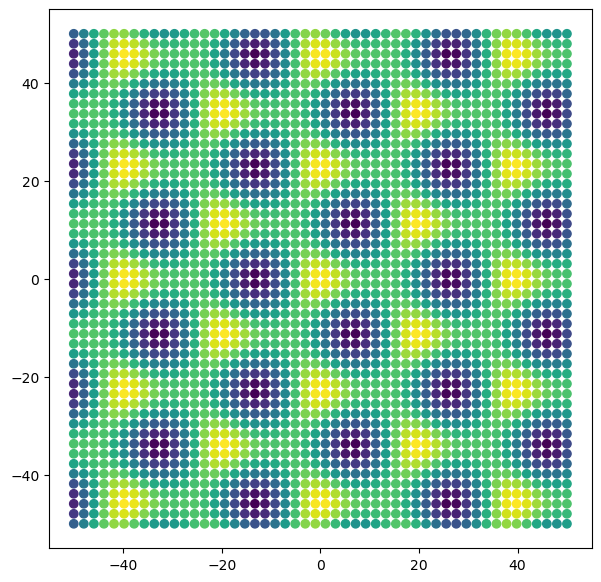

In [84]:
def p3_pos(x,y):
    X = 1/(2 * pi) * (x + y / (3**(1/2)))
    Y = 1/(2 * pi) * 2 * y / (3**(1/2))
    C = cos(X + Y) + cos(X - 2 * Y) + cos(-2 * X + Y)
    S = sin(X + Y) +sin(X - 2*Y) +sin(-2 * X + Y)
    return C + S + 4.1

view_window_continuous(p3_pos, 50,100)

In [85]:
pixels = get_pixels(num_pixels=50, window_size=70)
isos_inv = generate_isom(n_isos=10, x_translate=200, y_translate=200)
colors = []
for i in isos_inv:
    colors.append(new_colors(pixels = pixels, iso_inv = i, image_function = p3_pos))
    
colors

[[3.6047825690752746,
  3.3820315219699224,
  3.307328265399175,
  3.386259292065561,
  3.59855378243986,
  3.903863095809418,
  4.2505940952722465,
  4.586027847688459,
  4.865820974952367,
  5.061200403118528,
  5.162672629373715,
  5.179773329693783,
  5.1371473931040965,
  5.067931230733744,
  5.005884878104478,
  4.977907893424118,
  4.998442171325484,
  5.066847585641859,
  5.168216664011697,
  5.277392902170703,
  5.365308730520358,
  5.4062876875773,
  5.384751475057984,
  5.299876266386418,
  5.167135959477472,
  5.016280191159293,
  4.886007358349227,
  4.816272321667688,
  4.839683697975182,
  4.973693968056846,
  5.215212292402368,
  5.538879150125975,
  5.899597246012174,
  6.2391270557094085,
  6.495769824185545,
  6.615521937841339,
  6.562716195133285,
  6.328146060866429,
  5.9330161270795205,
  5.427727589759947,
  4.885384420730008,
  4.390845268368102,
  4.026982766118145,
  3.8603930778558495,
  3.9290111566097297,
  4.23387921393204,
  4.736707049915353,
  5.36394

In [87]:
min(min(colors))

0.01912349870362373

In [88]:
colors_softmax = []
for i in range(len(colors)):
    colors_softmax.append(softmax(colors[i]))

In [89]:
colors

[[8.226715398530787e-05,
  6.583956042187803e-05,
  6.110035176216252e-05,
  6.611850418610447e-05,
  8.175632201928661e-05,
  0.00011094698268338278,
  0.00015692742748929712,
  0.00021947036359413514,
  0.00029032771389449197,
  0.0003529723626299323,
  0.0003906695208180401,
  0.00039740769274207015,
  0.0003808237809803657,
  0.0003553561722619027,
  0.00033397770392106353,
  0.0003247635085137754,
  0.0003315012330550764,
  0.00035497130085962545,
  0.00039284142115579503,
  0.0004381591760899287,
  0.00047842434438639714,
  0.000498436921853063,
  0.0004878172426654032,
  0.0004481220481875843,
  0.00039241710497222947,
  0.0003374676146365354,
  0.000296247933312864,
  0.0002762929399772738,
  0.00028283764937059807,
  0.00032339785872087626,
  0.00041174393960393703,
  0.0005691070241222912,
  0.0008163038116985137,
  0.001146324955801664,
  0.0014817204859591676,
  0.0016702211065157018,
  0.001584312048122843,
  0.001253049449226174,
  0.0008440447250827879,
  0.0005092387419

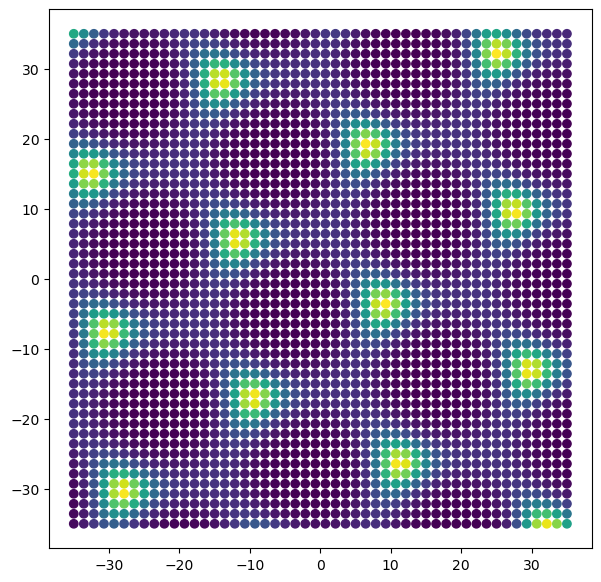

In [90]:
x_points = []
y_points = []
for i in range(len(pixels)):
    x_points.append(pixels[i][0])
    y_points.append(pixels[i][1])
    
fig = plt.figure(figsize = (7, 7))
ax = plt.axes()
ax.scatter(x_points, y_points, c = colors[0])
plt.show()

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


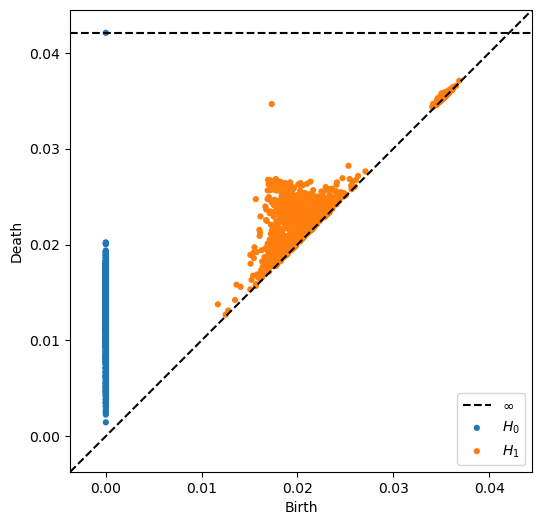

In [91]:
output = pipeline_softmax(image_function=p3_pos, num_pixels = 50, window_size = 50, n_isos=1000, x_translate=200, y_translate=200, maxdim=1, coeff=3)
plot_dgms(output)

In [92]:
persistent_H1_intervals(output)

[0.017343275249004364,
 0.009820491075515747,
 0.00972503051161766,
 0.009588314220309258,
 0.009442312642931938,
 0.009292135015130043,
 0.009143225848674774,
 0.009118711575865746,
 0.009082026779651642,
 0.009079763665795326,
 0.008831307291984558,
 0.008766688406467438,
 0.008764861151576042,
 0.008756536990404129,
 0.00866691954433918,
 0.008660467341542244,
 0.008638421073555946,
 0.008591394871473312,
 0.008557207882404327,
 0.00851561687886715,
 0.008480040356516838,
 0.008378587663173676,
 0.008377432823181152,
 0.008293349295854568,
 0.00829312577843666,
 0.008222412317991257,
 0.008140983060002327,
 0.007929669693112373,
 0.007899580523371696,
 0.007856009528040886,
 0.007848966866731644,
 0.007822021842002869,
 0.0077561307698488235,
 0.007659103721380234,
 0.007456040009856224,
 0.007321637123823166,
 0.007268205285072327,
 0.007256301119923592,
 0.00716574490070343,
 0.007134515792131424,
 0.007081368938088417,
 0.007046816870570183,
 0.007008673623204231,
 0.006921909749

In [5]:
def softmax2(vector):
    sum_exp = 0
    for x in vector:
        sum_exp = sum_exp + exp(abs(x))
    for i in range(len(vector)):
        if vector[i] >= 0:
            vector[i] = exp(vector[i])/sum_exp
        else: 
            vector[i] = - exp(abs(vector[i]))/sum_exp
    return vector

In [11]:
pixels = get_pixels(num_pixels=50, window_size=70)
isos_inv = generate_isom(n_isos=10, x_translate=200, y_translate=200)
colors = []
for i in isos_inv:
    colors.append(new_colors(pixels = pixels, iso_inv = i, image_function = p3))
    
colors

[[2.319716593397107,
  2.2469648604670365,
  2.0274822134292676,
  1.685329097166516,
  1.2672848729703734,
  0.8365182622013967,
  0.4629741255322154,
  0.21195016646142562,
  0.13273283943676795,
  0.2492510415484398,
  0.5544604662830095,
  1.0096191483062555,
  1.5488380620746662,
  2.0884136103650177,
  2.5396171562786742,
  2.822973675767031,
  2.881723462753861,
  2.6921963622165204,
  2.269245261822105,
  1.6656285623011633,
  0.9651875311257374,
  0.2706818921019839,
  -0.311941344762517,
  -0.6904196792888505,
  -0.8014870504009486,
  -0.6220851655660637,
  -0.1745146653201186,
  0.47551344585092226,
  1.2278475277396474,
  1.9626684429182353,
  2.5588734968190163,
  2.9132313709510433,
  2.957262733720772,
  2.6690822805089565,
  2.078172382238429,
  1.262138640924701,
  0.3357572204078373,
  -0.5661362073127371,
  -1.309345910781383,
  -1.7814025907758002,
  -1.9097027057382854,
  -1.6737636576812855,
  -1.1095320833622324,
  -0.3049029130891133,
  0.6130152728574148,
  1.4

In [12]:
max(max(colors))

2.998788776728511

In [13]:
min(min(colors))

-4.0960646299647525

In [14]:
for i in range(len(colors)):
    softmax2(colors[i])

In [15]:
colors

[[0.0005254276187773734,
  0.0004885592286468014,
  0.00039228086008336174,
  0.0002786133412022759,
  0.00018342038838421704,
  0.00011922519643928695,
  8.206158279960164e-05,
  6.384421759717425e-05,
  5.898178627564196e-05,
  6.627063520529334e-05,
  8.992323086153906e-05,
  0.00014175709551847863,
  0.00024306621883007475,
  0.00041692629683636557,
  0.0006546580288218256,
  0.0008691098486450165,
  0.0009216995588475818,
  0.0007625684018734282,
  0.0004995666943705528,
  0.0002731782225172196,
  0.00013559647515581696,
  6.770619901767413e-05,
  -7.055815013018899e-05,
  -0.0001030192154817844,
  -0.00011512090224944478,
  -9.621459055891138e-05,
  -6.149836043949454e-05,
  8.30970577807529e-05,
  0.00017632755571926392,
  0.0003676620936385065,
  0.0006673865053873909,
  0.0009512027348856484,
  0.0009940212486477936,
  0.000745144478258307,
  0.0004126782492594998,
  0.0001824788891682672,
  7.225872421073539e-05,
  -9.09793044412208e-05,
  -0.00019129978650008777,
  -0.000306

In [16]:
max(max(colors))

0.0010834458367354218

In [17]:
min(min(colors))

-0.003321303377116102

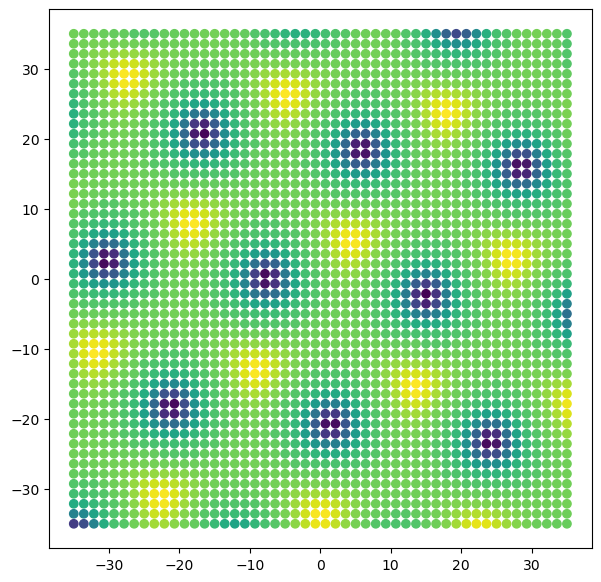

In [101]:
x_points = []
y_points = []
for i in range(len(pixels)):
    x_points.append(pixels[i][0])
    y_points.append(pixels[i][1])
    
fig = plt.figure(figsize = (7, 7))
ax = plt.axes()
ax.scatter(x_points, y_points, c = colors[0])
plt.show()

In [6]:
def matrix_of_images_softmax2(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([softmax2(new_colors(pixels, i, image_function))])
    M = np.concatenate(vectors, axis=0 )
    return M

def pipeline_softmax2(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images_softmax2(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


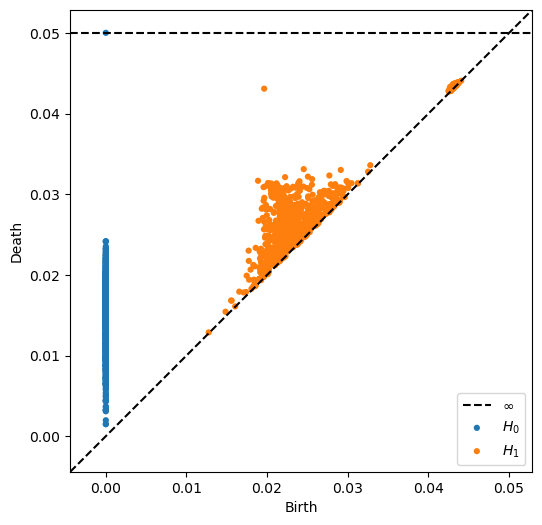

In [115]:
output = pipeline_softmax2(image_function=p3, num_pixels = 50, window_size = 50, n_isos=1000, x_translate=200, y_translate=200, maxdim=1, coeff=3)
plot_dgms(output)

In [116]:
persistent_H1_intervals(output)

[0.023457948118448257,
 0.012795628979802132,
 0.011325724422931671,
 0.011278830468654633,
 0.011212728917598724,
 0.011205015704035759,
 0.010953165590763092,
 0.010826187208294868,
 0.010612277314066887,
 0.010270757600665092,
 0.010197382420301437,
 0.010174958035349846,
 0.010072678327560425,
 0.010032810270786285,
 0.00992671586573124,
 0.009906213730573654,
 0.009893983602523804,
 0.009828627109527588,
 0.009721798822283745,
 0.009623609483242035,
 0.009617995470762253,
 0.009591661393642426,
 0.009466605260968208,
 0.009169869124889374,
 0.009169496595859528,
 0.009156627580523491,
 0.009135592728853226,
 0.00909903272986412,
 0.009013552218675613,
 0.008891979232430458,
 0.008886810392141342,
 0.00886479951441288,
 0.008804947137832642,
 0.008793197572231293,
 0.008775521069765091,
 0.008755406364798546,
 0.00863601453602314,
 0.008586592972278595,
 0.008570916950702667,
 0.008487673476338387,
 0.008429691195487976,
 0.008303724229335785,
 0.00828440673649311,
 0.0082695037126

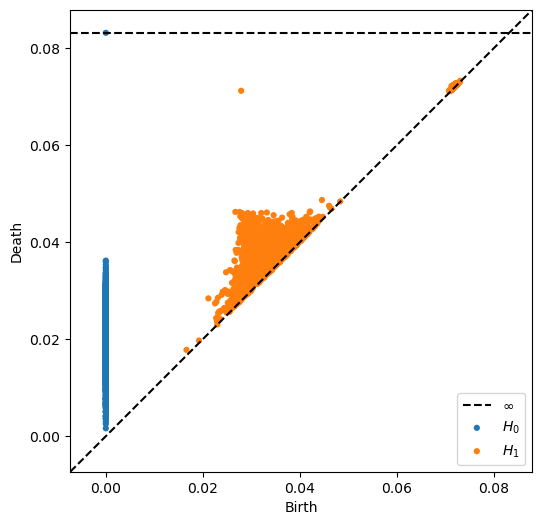

In [7]:
output = pipeline_softmax2(image_function=p3, num_pixels = 30, window_size = 50, n_isos=2000, x_translate=200, y_translate=200, maxdim=1, coeff=3)
plot_dgms(output)